<a href="https://colab.research.google.com/github/MajidNoorani/feature-importance/blob/main/Feature_Importance_EigenDecomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation and Import Packages

In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quality  6497 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


# Split data into train and test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4547, 11), (1950, 11), (4547, 1), (1950, 1))

# Normalize data
normalization is necessary because values must be in the same range to find the importance of them

In [6]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Find Eigen values

In [7]:
cov_mat = np.cov(X_train_normalized.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [3.06364236 2.47741976 1.56552708 0.03369888 0.97006085 0.22244345
 0.33491604 0.7125878  0.60362232 0.49490864 0.52359253]


# Plotting
features importance and variance in a cumulative scenario

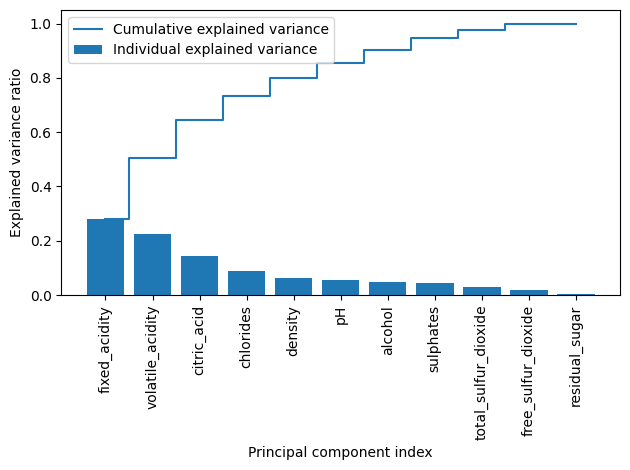

In [8]:
tot = sum(eigen_vals)
eigen_name_pairs = [(np.abs(eigen_vals[i]), X_train.columns[i]) for i in range(len(eigen_vals))]
eigen_name_pairs.sort(key=lambda k: k[0], reverse=True)
var_exp = [(i[0] / tot) for i in eigen_name_pairs]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,12), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1,12), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.xticks(range(1,12), [i[1] for i in eigen_name_pairs],
       rotation=90)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# PCA dimentionality reduction

In [9]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [10]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis]))

In [11]:
X_train_pca = X_train_normalized.dot(w)

In [12]:
X_train_pca

array([[ 5.21015929,  0.07837723,  3.21461813],
       [-1.53068268,  1.09213845, -0.38261538],
       [-2.16056225,  2.58309134, -0.53837866],
       ...,
       [-0.4308423 , -1.60641846, -1.13552595],
       [-0.66875154, -2.18136389, -0.9394647 ],
       [ 0.24490815, -0.51916175, -0.95906831]])

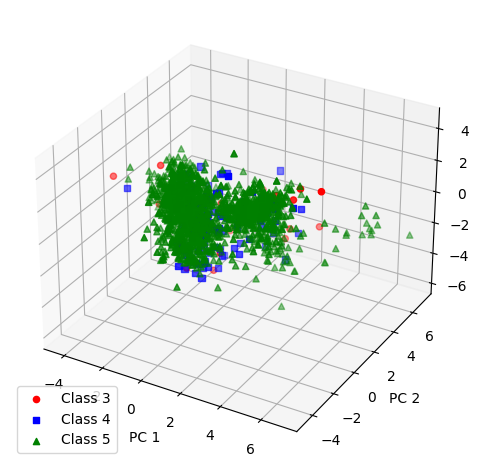

In [13]:
from mpl_toolkits import mplot3d
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
ax = plt.axes(projection ="3d")
for l, c, m in zip(np.unique(y_train), colors, markers):
  ax.scatter3D(X_train_pca[np.where(y_train == l)[0].tolist(), 0],
              X_train_pca[np.where(y_train == l)[0].tolist(), 1],
               X_train_pca[np.where(y_train == l)[0].tolist(), 2],
              c=c,
              label=f'Class {l}',
              marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Loadings

In [14]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

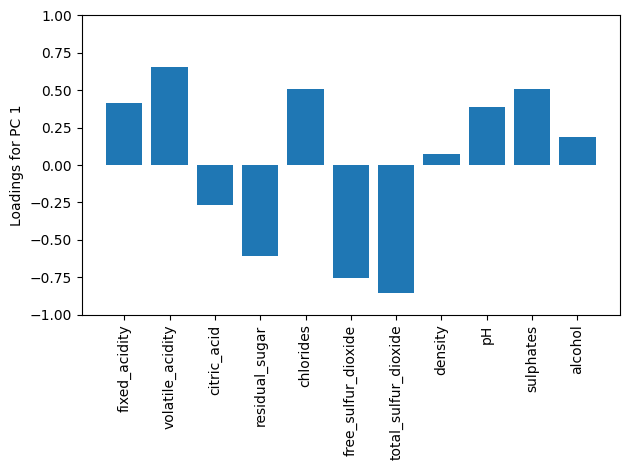

In [17]:
fig, ax = plt.subplots()
ax.bar(range(11), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(11))
ax.set_xticklabels(X, rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()